1. Provide options which dataset/forest to load
2. Precompute maps and cable roads
3. Set A-Value, slope, etc.
4. Provide pre-computed optimized results
5. Editor
   - top layout
   - Pareto frontier
   - Current layout properties
6. Export? to exact positions of tree


In [2]:
# ignore the nopython dependency warning, as it cant be fixed with current dependencies
import warnings

warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

# Package Imports
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

from shapely.geometry import LineString, Polygon, Point

import pickle

# Importing my modules
from src.main import data_loading, plotting_2d

In [3]:
%load_ext autoreload
%autoreload 2

#### Preprocessing


In [37]:
# # Load, preprocess and save the dataframe with the corresponding number - only needed to do once
# data_loading.load_and_preprocess_raw_data(data_to_load=3)

In [30]:
# tree_gdf, height_gdf = data_loading.load_processed_gdfs(data_to_load=3)

#### Area-Specific Setup


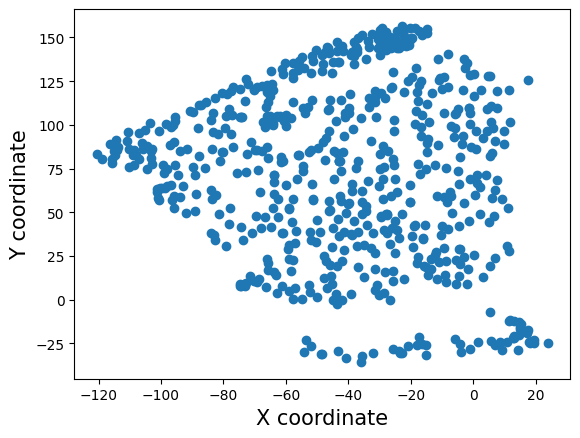

In [32]:
# # create coordinates for each dataframe with the corresponding upper and lower anchors
# coords = []
# fig, ax = plt.subplots()
# ax.set_xlabel("X coordinate", fontsize=15)
# ax.set_ylabel("Y coordinate", fontsize=15)
# ax.scatter(tree_gdf["x"], tree_gdf["y"])

# cid = fig.canvas.mpl_connect(
#     "button_press_event", lambda event: plotting_2d.onclick(event, coords)
# )

In [33]:
# # manually insert those coordinates
# # recorded coordinates for the given areas
# downhill_anchors = Polygon(
#     [
#         Point(xy)
#         for xy in [
#             (-123.88268627035482, 83.05479790035122),
#             (-74.89307684787903, 138.5299549848453),
#             (-21.10056454084676, 161.97821725767267),
#             (-6.051468835903222, 148.2524051955298),
#             (-60.16417466857257, 116.79741921978575),
#             (-115.23746107815322, 64.75371515082742),
#         ]
#     ]
# )
# uphill_anchors = Polygon(
#     [
#         Point(xy)
#         for xy in [
#             (-55.04107825837903, -15.31352187833928),
#             (-17.578435758838708, -17.601157222029755),
#             (4.194723984483858, -1.5877098161964227),
#             (30.450593086725803, -30.18315161232738),
#             (-11.49475877173387, -41.04941949485714),
#             (-58.5632070403871, -38.189875315244045),
#         ]
#     ]
# )
# # road = LineString([(-57.282432937838706, -17.029248386107135), (-34.86888614324194, -21.604519073488092), (-15.337081079379033, -15.31352187833928), (-0.2879853744354932, -7.878707011345227), (12.51975565104837, 6.990922722642864), (19.884206740701615, 21.86055245663097)])
# # road = LineString([(-59.52378761729838, -12.453977698726185), (-41.91314370725806, -13.597795370571419), (-18.218822810112897, -10.16634235503571), (3.2341434075725886, 0.12801669157144602), (15.401497381782264, 23.576278964398824), (17.00246500996775, 26.43582314401192)])
# road = LineString(
#     [
#         (-89.6286010742188, -24.4624996185303),
#         (-69.618896484375, -20.364200592041),
#         (-41.314998626709, -13.9251003265381),
#         (-29.2644004821777, -8.47910022735596),
#         (-20.2950000762939, -3.67030000686646),
#         (-15.375, -0.148599997162819),
#         (-6.49030017852783, 2.74860000610352),
#         (0.943400025367737, 3.86450004577637),
#         (15.1605997085571, -0.302300006151199),
#         (29.3377990722656, -3.47709989547729),
#     ]
# )

# inner_forest = Polygon(
#     [
#         Point(xy)
#         for xy in [
#             (-105.43005197808363, 62.73802056488026),
#             (-10.557896233758669, 146.34023494632802),
#             (13.160142702322588, 51.07259530235265),
#             (8.890895693827957, 9.27148811162877),
#             (-55.62217021231302, -10.17088732591722),
#             (-81.71201304200238, 18.992675830401765),
#         ]
#     ]
# )

# extra_geometry_gpd = gpd.GeoDataFrame(
#     pd.DataFrame(
#         {
#             "name": ["uphill_anchors", "road", "downhill_anchors", "inner_forest"],
#             "geometry": [uphill_anchors, road, downhill_anchors, inner_forest],
#         }
#     )
# )

# # set the name as index to easily select the geometry
# extra_geometry_gpd.set_index("name", inplace=True)
# extra_geometry_gpd.loc["road"]

# # plotting.plot_gdfs([tree_gdf,extra_geometry_gpd])

/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


geometry    LINESTRING (-89.62860 -24.46250, -69.61890 -20...
Name: road, dtype: geometry

In [34]:
# from src.main import classes_cable_road_computation

# # create a class instance of the forest area with all the necessary attributes
# forest_area_3 = classes_cable_road_computation.forest_area(
#     tree_gdf, height_gdf, extra_geometry_gpd
# )

#### Compute the cable roads


In [33]:
forest_area_3.compute_cable_road()

2304  candidates initially
2278  after slope deviations
1388  after supports trees
75  after possible anchor triples
Tension to begin with is 85000.0
checking if tower and anchor trees hold
exerted force 85000.0
did not find anchor tree that holds - iterating
exerted force 85000.0
did not find anchor tree that holds - iterating
exerted force 85000.0
found anchor tree that holds
Tower and anchors hold: True
After the iterative process it is now 85000.0
checking if no collisions overall line
Found collisions
Need to find supports
Setting up support candidates
raising height to  6
checking if support withstands tension
Support withstands tension: True
checking if no collisions overall line
checking if no collisions overall line
No collisions: True
found viable sub-config
Tension to begin with is 85000.0
checking if tower and anchor trees hold
exerted force 85000.0
did not find anchor tree that holds - iterating
exerted force 85000.0
did not find anchor tree that holds - iterating
exerted 

KeyboardInterrupt: 

In [24]:
forest_area_3.compute_line_costs()

In [47]:
# store forest_area_3
# output = open("forest_area_3.pkl", "wb")
# pickle.dump(forest_area_3, output)

In [6]:
# # load the forest_area_3
# pkl_file = open("forest_area_3.pkl", "rb")
# forest_area_3 = pickle.load(pkl_file)

#### Create the optimization


In [26]:
from src.main import optimization_execution


def optimization_main_loop(forest_area_gdf):
    """Main loop for the optimization algorithm"""

    optimization_result_list = []
    model_list = []

    # first the basis optimization
    print("Starting basis optimization")
    (
        model_list,
        optimization_result_list,
    ) = optimization_execution.soo_optimization_augmecon(
        model_list, optimization_result_list, forest_area_gdf
    )

    # then the manual weights optimization
    print("Starting manual weights optimization")
    optimization_result_list = optimization_execution.soo_optimization_manual_weights(
        model_list, optimization_result_list, forest_area_gdf
    )

    # then the NSGA II optimization
    print("Starting NSGA II optimization")
    optimization_result_list = optimization_execution.nsga_optimization(
        model_list, optimization_result_list, forest_area_gdf
    )

    # create a result df to save the results
    results_df = optimization_execution.create_results_df(
        optimization_result_list, model_list[0], forest_area_gdf
    )

    # create ranges for the different objectives based on the results
    (
        ecological_range,
        ecological_step,
        ergonomics_range,
        ergonomics_step,
    ) = optimization_execution.compute_augmecon_ranges(results_df)

    # conduct the augmecon optimization
    print("Starting augmecon optimization")
    optimization_result_list = optimization_execution.augmecon_optimization(
        optimization_result_list,
        ecological_range,
        ecological_step,
        ergonomics_range,
        ergonomics_step,
        forest_area_gdf,
    )

    # and finally the expert layout optimization
    print("Starting expert layout optimization")
    optimization_result_list = optimization_execution.expert_layout_optimization(
        optimization_result_list, model_list[0], forest_area_gdf
    )

    # and final result list
    results_df = optimization_execution.create_results_df(
        optimization_result_list, model_list[0], forest_area_gdf
    )

    return results_df, optimization_result_list, model_list


results_df, optimization_result_list, model_list = optimization_main_loop(forest_area_3)

Starting basis optimization
Starting with objective 0
test
Starting with objective 1
test
Starting with objective 2
test
Starting manual weights optimization


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
Starting NSGA II optimization


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/src/main/classes_mo_optimization.py:425: RuntimeWarning:

overflow encountered in exp



Profit baseline is 56671.01282480877
Starting augmecon optimization
test
i should be : 6440.194550616288
test
i is : 5896.784719449101
          j should be: 9799.734455920683
test
          j is :  9196.046850669936
          cost is : 12052.99781380635
         skipping j_bypass: 3
          j should be: 9181.758452406482


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
          j is :  9180.758452406482
          cost is : 13267.167483232242
i should be : 6285.417845255673


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
i is : 5896.784719449101
          j should be: 9799.734455920683
test
          j is :  9196.046850669936
          cost is : 12181.21750258691
         skipping j_bypass: 3
          j should be: 9181.758452406482


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
          j is :  9180.758452406482
          cost is : 13267.167483232242
i should be : 6130.641139895057


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
i is : 5896.784719449101
          j should be: 9799.734455920683
test
          j is :  9196.046850669936
          cost is : 12045.949917110194
         skipping j_bypass: 3
          j should be: 9181.758452406482


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
          j is :  9180.758452406482
          cost is : 13267.167483232242
i should be : 5975.86443453444


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
i is : 5896.784719449101
          j should be: 9799.734455920683
test
          j is :  9196.046850669936
          cost is : 12045.949917110194
         skipping j_bypass: 3
          j should be: 9181.758452406482


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
          j is :  9180.758452406482
          cost is : 13267.167483232242
i should be : 5821.087729173824


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
i is : 5820.087729173824
          j should be: 9799.734455920683
test
          j is :  9191.817929224191
          cost is : 13132.424506752535
         skipping j_bypass: 3
          j should be: 9181.758452406482


/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/pulp/pulp.py:1704: UserWarning:

Overwriting previously set objective.



test
couldnt solve with j  9181.758452406482
Starting expert layout optimization
Profit baseline is 54219.66607329596


In [11]:
# results_df = optimization_execution.create_results_df(
#     optimization_result_list, model_list[0], forest_area_3
# )

Profit baseline is 57990.972493274625


In [17]:
# optimization_results = [results_df, optimization_result_list, model_list]
# # store optimization_results
# output = open("optimization_results.pkl", "wb")
# pickle.dump(optimization_results, output, protocol=4)

In [18]:
# # load the optimization_results
# pkl_file = open("optimization_results.pkl", "rb")
# optimization_results = pickle.load(pkl_file)
# results_df, optimization_result_list, model_list = optimization_results

In [6]:
# # and the forest_area_3
# pkl_file = open("forest_area_3.pkl", "rb")
# forest_area_3 = pickle.load(pkl_file)

#### Plotting


In [4]:
# load the optimization_results
pkl_file = open("optimization_results.pkl", "rb")
optimization_results = pickle.load(pkl_file)
results_df, optimization_result_list, model_list = optimization_results

# and the forest_area_3
pkl_file = open("forest_area_3.pkl", "rb")
forest_area_3 = pickle.load(pkl_file)

from src.main import global_vars

kdtree = global_vars.init(forest_area_3.height_gdf)

In [27]:
from ipywidgets import VBox, HBox
from src.main.interface import interactive_cr_selection

(
    interactive_layout,
    current_cable_roads_table_figure,
    layout_overview_table_figure,
    pareto_frontier,
    pareto_explanation_widget,
    move_left_button,
    move_right_button,
    reset_all__CRs_button,
    add_to_layout_button,
    reset_comparison_button,
    view_in_3d_button,
    dropdown_menu,
    layout_comparison_figure,
    layout_3d_scatter_plot,
) = interactive_cr_selection(
    forest_area_3, model_list, optimization_result_list, results_df
)


interface = VBox(
    [
        HBox(
            [
                move_left_button,
                move_right_button,
                reset_all__CRs_button,
                add_to_layout_button,
                reset_comparison_button,
                dropdown_menu,
                view_in_3d_button,
            ]
        ),
        HBox(
            [
                interactive_layout,
                layout_comparison_figure,
            ]
        ),
        HBox(
            [
                VBox(
                    [
                        pareto_frontier,
                        pareto_explanation_widget,
                    ]
                ),
                VBox(
                    [
                        current_cable_roads_table_figure,
                        layout_overview_table_figure,
                    ]
                ),
            ]
        ),
        layout_3d_scatter_plot,
    ]
)

display(interface)

/home/carlo/GitHub/MultiObjectOptimizationCableYarding/src/main/interface.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
forest_area_3.line_gdf.tail(1)["Cable Road Object"].iloc[0].supported_segments[
    0
].cable_road.sloped_line_to_floor_distances

array([ 9.25169215,  8.38311523,  7.52201037,  6.6699756 ,  5.82490826,
        5.01178793,  4.26711672,  3.66549693,  3.5952473 ,  4.18664848,
        4.39198839,  3.87358026,  3.30309695,  2.69811666,  2.1133085 ,
        1.55237313,  0.98183625,  0.40489391, -0.14573656, -0.68595123,
       -1.22071239, -1.74631936, -2.2477171 , -2.53684395, -2.67307896,
       -2.46121141, -1.97113363, -0.09457702,  1.71140102,  3.37446908,
        4.81708115,  5.0107855 ,  5.01691943,  4.84330482,  4.64553832,
        4.45372997,  4.26098306,  3.98335951,  3.70639542,  3.44405243,
        3.16260393,  2.81133381,  2.55803413,  2.30909459,  1.98503474,
        1.76483276,  1.55008431,  1.2623182 ,  0.89833841,  0.62467537,
        0.45116955,  0.2091037 ,  0.09091303,  0.02149062,  0.05760821,
        0.76782435,  3.16074169,  4.52216606,  4.79986747,  4.95837688,
        5.01022611,  5.06071625,  5.01455487,  4.80555032,  4.71234674,
        4.63351195,  4.53262792,  4.73927093,  5.02737083,  5.54